Fashion_mnist is a basic classification: Classify images of clothing. The original tutorial is [here](https://www.tensorflow.org/tutorials/keras/classification).

In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
layers = tf.keras.layers

import gzip
import numpy as np

### Dataset

In [3]:
# data path
files = ['train-labels-idx1-ubyte.gz', 'train-images-idx3-ubyte.gz',
      't10k-labels-idx1-ubyte.gz', 't10k-images-idx3-ubyte.gz']

paths = []
for fname in files:
    paths.append('./Fashion-MNIST/' + fname)
print(paths)

['./Fashion-MNIST/train-labels-idx1-ubyte.gz', './Fashion-MNIST/train-images-idx3-ubyte.gz', './Fashion-MNIST/t10k-labels-idx1-ubyte.gz', './Fashion-MNIST/t10k-images-idx3-ubyte.gz']


In [9]:
# read data
with gzip.open(paths[0], 'rb') as lbpath:
    y_train = np.frombuffer(lbpath.read(), np.uint8, offset=8)

with gzip.open(paths[1], 'rb') as imgpath:
    x_train = np.frombuffer(
    imgpath.read(), np.uint8, offset=16).reshape(len(y_train), 28, 28)

with gzip.open(paths[2], 'rb') as lbpath:
    y_test = np.frombuffer(lbpath.read(), np.uint8, offset=8)

with gzip.open(paths[3], 'rb') as imgpath:
    x_test = np.frombuffer(imgpath.read(), np.uint8, offset=16).reshape(len(y_test), 28, 28)
    
    
x_train = x_train / 255.0

x_test = x_test / 255.0

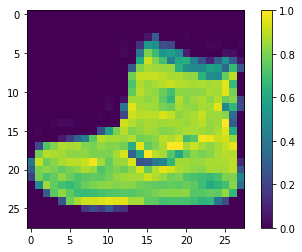

label:  9


In [17]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

print("label: ",y_train[0])

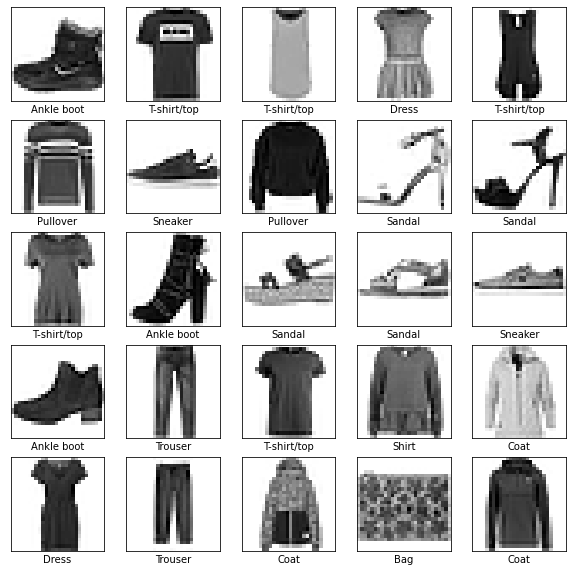

In [10]:
# show data
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

### Model

In [11]:
# model
model = tf.keras.Sequential()
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 64us/sample - loss: 0.5092 - accuracy: 0.8203
Epoch 2/5
60000/60000 [==============================] - 4s 60us/sample - loss: 0.3771 - accuracy: 0.8621
Epoch 3/5
60000/60000 [==============================] - 3s 57us/sample - loss: 0.3414 - accuracy: 0.8749
Epoch 4/5
60000/60000 [==============================] - 3s 57us/sample - loss: 0.3183 - accuracy: 0.8816
Epoch 5/5
60000/60000 [==============================] - 3s 58us/sample - loss: 0.3038 - accuracy: 0.8873


### Test

In [12]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

10000/1 - 0s - loss: 0.2902 - accuracy: 0.8758

Test accuracy: 0.8758


In [13]:
predictions = model.predict(x_test)

After prediction, let's show one.

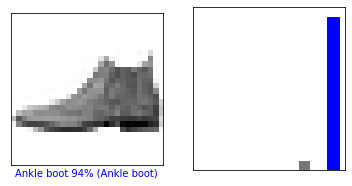

In [14]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                   100*np.max(predictions_array), class_names[true_label]), color=color)
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')
    predictions = model.predict(x_test)
# change i to show a different object
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions, y_test)
plt.show()

As shown in the plot above, the prediction probability of 'Ankle boot' is the highest. To further confirm, Let's print the predicted label.

In [15]:
predicted_label = class_names[np.argmax(predictions[0])]
print('Actual label:', class_names[y_test[0]]) 
print('Predicted label:', predicted_label)

Actual label: Ankle boot
Predicted label: Ankle boot
